In [3]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
import simtk.openmm as mm
import simtk.unit as unit
import simtk.openmm.app as app
from tqdm import tqdm

In [4]:
# Definiendo el toy model

n_particles = 1
system = mm.System()
mass   = 14.007 * unit.amu # masa del átomo N
system.addParticle(mass)

force = mm.CustomExternalForce('Eo*(C*x^4-x^2)+M*x + (K/2.0)*(y^2+z^2)')
force.addGlobalParameter('K', 35 * unit.kilocalories_per_mole/unit.angstrom**2)
force.addGlobalParameter('Eo', 6.0 * unit.kilocalories_per_mole/unit.angstrom**2)
force.addGlobalParameter('C', 0.4 * 1/unit.angstrom**2)
force.addGlobalParameter('M', 0.25 * unit.kilocalories_per_mole/unit.angstrom)
force.addParticle(0, [])
system.addForce(force)

0

In [7]:
# Réplica 1 300 K

# Formalismo NVT
kB = unit.BOLTZMANN_CONSTANT_kB * unit.AVOGADRO_CONSTANT_NA
temperature = 300*unit.kelvin
pressure    = None

step_size       = 0.01*unit.picoseconds
num_steps       = 200000
saving_period   = 100
num_steps_saved = int(num_steps/saving_period)

friction   = 1.0/unit.picosecond
integrator = mm.LangevinIntegrator(temperature, friction, step_size)

platform_name = 'CPU'  
platform = mm.Platform.getPlatformByName(platform_name)

times      = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.picoseconds)
positions  = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms)
velocities = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms/unit.picosecond)
potential_energies   = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)
kinetic_energies    = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)

initial_positions  = np.zeros([n_particles, 3], np.float32) * unit.nanometers

#initial_velocities = None # Las velocidades serán adjudicadas aleatoriamente según la distribución Maxwell-Boltzmann del estado termodinámico

context = mm.Context(system, integrator, platform)
context.setPositions(initial_positions)
context.setVelocitiesToTemperature(temperature)

state = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
times[0] = state.getTime()
positions[0] = state.getPositions()[0]
velocities[0] = state.getVelocities()[0]
kinetic_energies[0]=state.getKineticEnergy()
potential_energies[0]=state.getPotentialEnergy()

for ii in tqdm(range(num_steps_saved)):
    context.getIntegrator().step(saving_period)
    state = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
    times[ii] = state.getTime()
    positions[ii] = state.getPositions()[0]
    velocities[ii] = state.getVelocities()[0]
    kinetic_energies[ii]=state.getKineticEnergy()
    potential_energies[ii]=state.getPotentialEnergy()
    

temperature2 = 304*unit.kelvin
integrator2 = mm.LangevinIntegrator(temperature, friction, step_size)

times2      = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.picoseconds)
positions2  = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms)
velocities2 = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms/unit.picosecond)
potential_energies2   = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)
kinetic_energies2     = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)

initial_positions2  = np.zeros([n_particles, 3], np.float32) * unit.nanometers

#initial_velocities = None # Las velocidades serán adjudicadas aleatoriamente según la distribución Maxwell-Boltzmann del estado termodinámico

context2 = mm.Context(system, integrator2, platform)
context2.setPositions(initial_positions)
context2.setVelocitiesToTemperature(temperature)

state2 = context2.getState(getEnergy=True, getPositions=True, getVelocities=True)
times2[0] = state.getTime()
positions2[0] = state.getPositions()[0]
velocities2[0] = state.getVelocities()[0]
kinetic_energies2[0]=state.getKineticEnergy()
potential_energies2[0]=state.getPotentialEnergy()

for jj in tqdm(range(num_steps_saved)):
    context2.getIntegrator().step(saving_period)
    state2 = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
    times2[jj] = state.getTime()
    positions2[jj] = state.getPositions()[0]
    velocities2[jj] = state.getVelocities()[0]
    kinetic_energies2[jj]=state.getKineticEnergy()
    potential_energies[jj]=state.getPotentialEnergy()

100%|██████████| 2000/2000 [00:55<00:00, 36.03it/s]


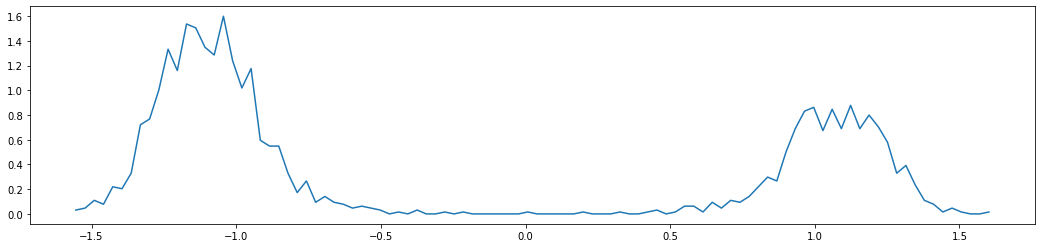

In [6]:
hist, bin_edges = np.histogram(positions[:,0],bins=100, density=True)
plt.plot((bin_edges[1:]+bin_edges[:-1])/2.0,hist)
plt.show()

In [2]:
Temps = [300,305,310,315,320]
Rep = [1,2,3,4,5]
for ii in Temps:
    pressure    = None

    step_size       = 0.01*unit.picoseconds
    num_steps       = 200000
    saving_period   = 100
    num_steps_saved = int(num_steps/saving_period)

    friction   = 1.0/unit.picosecond
    integrator = mm.LangevinIntegrator(temperature, friction, step_size)

    platform_name = 'CPU'  
    platform = mm.Platform.getPlatformByName(platform_name)

    times      = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.picoseconds)
    positions  = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms)
    velocities = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms/unit.picosecond)
    potential_energies   = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)
    kinetic_energies    = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)

    initial_positions  = np.zeros([n_particles, 3], np.float32) * unit.nanometers

    #initial_velocities = None # Las velocidades serán adjudicadas aleatoriamente según la distribución Maxwell-Boltzmann del estado termodinámico

    context = mm.Context(system, integrator, platform)
    context.setPositions(initial_positions)
    context.setVelocitiesToTemperature(temperature)

    state = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
    times[0] = state.getTime()
    positions[0] = state.getPositions()[0]
    velocities[0] = state.getVelocities()[0]
    kinetic_energies[0]=state.getKineticEnergy()
    potential_energies[0]=state.getPotentialEnergy()

    for ii in tqdm(range(num_steps_saved)):
        context.getIntegrator().step(saving_period)
        state = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
        times[ii] = state.getTime()
        positions[ii] = state.getPositions()[0]
        velocities[ii] = state.getVelocities()[0]
        kinetic_energies[ii]=state.getKineticEnergy()
        potential_energies[ii]=state.getPotentialEnergy()


300
305
310
315
320


In [5]:
# Intento de 4 réplicas

kB = unit.BOLTZMANN_CONSTANT_kB * unit.AVOGADRO_CONSTANT_NA
temperature = 300*unit.kelvin
pressure    = None

step_size       = 0.01*unit.picoseconds
num_steps       = 200000
saving_period   = 100
num_steps_saved = int(num_steps/saving_period)

friction   = 1.0/unit.picosecond
integrator = mm.LangevinIntegrator(temperature, friction, step_size)

platform_name = 'CPU'  
platform = mm.Platform.getPlatformByName(platform_name)

times      = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.picoseconds)
positions  = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms)
velocities = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms/unit.picosecond)
potential_energies   = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)
kinetic_energies    = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)

initial_positions  = np.zeros([n_particles, 3], np.float32) * unit.nanometers

#initial_velocities = None # Las velocidades serán adjudicadas aleatoriamente según la distribución Maxwell-Boltzmann del estado termodinámico

context = mm.Context(system, integrator, platform)
context.setPositions(initial_positions)
context.setVelocitiesToTemperature(temperature)

state = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
times[0] = state.getTime()
positions[0] = state.getPositions()[0]
velocities[0] = state.getVelocities()[0]
kinetic_energies[0]=state.getKineticEnergy()
potential_energies[0]=state.getPotentialEnergy()

for ii in tqdm(range(num_steps_saved)):
    context.getIntegrator().step(saving_period)
    state = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
    times[ii] = state.getTime()
    positions[ii] = state.getPositions()[0]
    velocities[ii] = state.getVelocities()[0]
    kinetic_energies[ii]=state.getKineticEnergy()
    potential_energies[ii]=state.getPotentialEnergy()
    

temperature2 = 305*unit.kelvin
step_size2       = 0.01*unit.picoseconds
num_steps2       = 200000
saving_period2   = 100
num_steps_saved2 = int(num_steps/saving_period)

friction2   = 1.0/unit.picosecond
integrator2 = mm.LangevinIntegrator(temperature2, friction2, step_size2)

times2      = unit.Quantity(np.zeros([num_steps_saved2], np.float32), unit.picoseconds)
positions2  = unit.Quantity(np.zeros([num_steps_saved2,3], np.float32), unit.angstroms)
velocities2 = unit.Quantity(np.zeros([num_steps_saved2,3], np.float32), unit.angstroms/unit.picosecond)
potential_energies2   = unit.Quantity(np.zeros([num_steps_saved2], np.float32), unit.kilocalories_per_mole)
kinetic_energies2     = unit.Quantity(np.zeros([num_steps_saved2], np.float32), unit.kilocalories_per_mole)

initial_positions2  = np.zeros([n_particles, 3], np.float32) * unit.nanometers

#initial_velocities = None # Las velocidades serán adjudicadas aleatoriamente según la distribución Maxwell-Boltzmann del estado termodinámico

context2 = mm.Context(system, integrator2, platform)
context2.setPositions(initial_positions2)
context2.setVelocitiesToTemperature(temperature2)

state2 = context2.getState(getEnergy=True, getPositions=True, getVelocities=True)
times2[0] = state2.getTime()
positions2[0] = state2.getPositions()[0]
velocities2[0] = state2.getVelocities()[0]
kinetic_energies2[0]=state2.getKineticEnergy()
potential_energies2[0]=state2.getPotentialEnergy()

for jj in tqdm(range(num_steps_saved)):
    context2.getIntegrator().step(saving_period)
    state2 = context2.getState(getEnergy=True, getPositions=True, getVelocities=True)
    times2[jj] = state2.getTime()
    positions2[jj] = state2.getPositions()[0]
    velocities2[jj] = state2.getVelocities()[0]
    kinetic_energies2[jj]=state2.getKineticEnergy()
    potential_energies[jj]=state2.getPotentialEnergy()
    
temperature3 = 310*unit.kelvin
pressure    = None

step_size3       = 0.01*unit.picoseconds
num_steps3       = 200000
saving_period3   = 100
num_steps_saved3 = int(num_steps/saving_period)

friction3   = 1.0/unit.picosecond
integrator3 = mm.LangevinIntegrator(temperature3, friction3, step_size3)

platform_name = 'CPU'  
platform = mm.Platform.getPlatformByName(platform_name)

times3      = unit.Quantity(np.zeros([num_steps_saved3], np.float32), unit.picoseconds)
positions3  = unit.Quantity(np.zeros([num_steps_saved3,3], np.float32), unit.angstroms)
velocities3 = unit.Quantity(np.zeros([num_steps_saved3,3], np.float32), unit.angstroms/unit.picosecond)
potential_energies3   = unit.Quantity(np.zeros([num_steps_saved3], np.float32), unit.kilocalories_per_mole)
kinetic_energies3    = unit.Quantity(np.zeros([num_steps_saved3], np.float32), unit.kilocalories_per_mole)

initial_positions3  = np.zeros([n_particles, 3], np.float32) * unit.nanometers

#initial_velocities = None # Las velocidades serán adjudicadas aleatoriamente según la distribución Maxwell-Boltzmann del estado termodinámico

context3 = mm.Context(system, integrator3, platform)
context3.setPositions(initial_positions3)
context3.setVelocitiesToTemperature(temperature3)

state3 = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
times3[0] = state3.getTime()
positions3[0] = state3.getPositions()[0]
velocities3[0] = state3.getVelocities()[0]
kinetic_energies3[0]=state3.getKineticEnergy()
potential_energies3[0]=state3.getPotentialEnergy()

for ii in tqdm(range(num_steps_saved)):
    context3.getIntegrator().step(saving_period)
    state3 = context3.getState(getEnergy=True, getPositions=True, getVelocities=True)
    times3[ii] = state3.getTime()
    positions3[ii] = state3.getPositions()[0]
    velocities3[ii] = state3.getVelocities()[0]
    kinetic_energies3[ii]=state3.getKineticEnergy()
    potential_energies3[ii]=state3.getPotentialEnergy()
    

temperature4 = 315*unit.kelvin
integrator4 = mm.LangevinIntegrator(temperature4, friction, step_size)

times4      = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.picoseconds)
positions4  = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms)
velocities4 = unit.Quantity(np.zeros([num_steps_saved,3], np.float32), unit.angstroms/unit.picosecond)
potential_energies4   = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)
kinetic_energies4     = unit.Quantity(np.zeros([num_steps_saved], np.float32), unit.kilocalories_per_mole)

initial_positions4  = np.zeros([n_particles, 3], np.float32) * unit.nanometers

#initial_velocities = None # Las velocidades serán adjudicadas aleatoriamente según la distribución Maxwell-Boltzmann del estado termodinámico

context4 = mm.Context(system, integrator4, platform)
context4.setPositions(initial_positions4)
context4.setVelocitiesToTemperature(temperature4)

state4 = context4.getState(getEnergy=True, getPositions=True, getVelocities=True)
times4[0] = state4.getTime()
positions4[0] = state4.getPositions()[0]
velocities4[0] = state4.getVelocities()[0]
kinetic_energies4[0]=state4.getKineticEnergy()
potential_energies4[0]=state4.getPotentialEnergy()

for jj in tqdm(range(num_steps_saved)):
    context4.getIntegrator().step(saving_period)
    state4 = context4.getState(getEnergy=True, getPositions=True, getVelocities=True)
    times4[jj] = state4.getTime()
    positions4[jj] = state4.getPositions()[0]
    velocities4[jj] = state4.getVelocities()[0]
    kinetic_energies4[jj]=state4.getKineticEnergy()
    potential_energies4[jj]=state4.getPotentialEnergy()

100%|██████████| 2000/2000 [00:54<00:00, 36.89it/s]


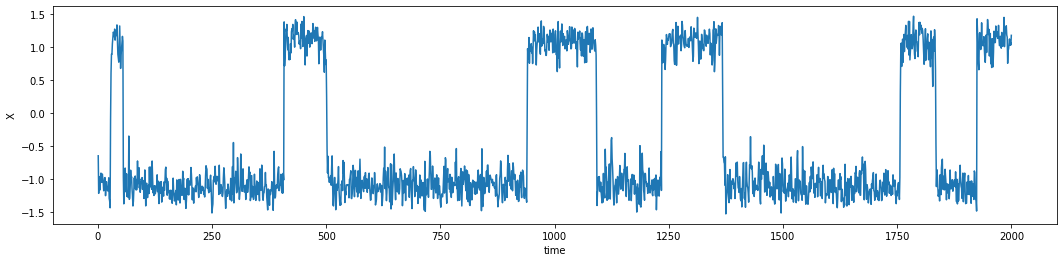

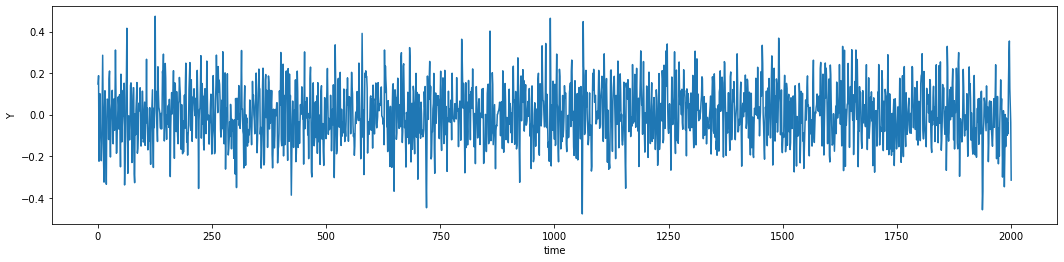

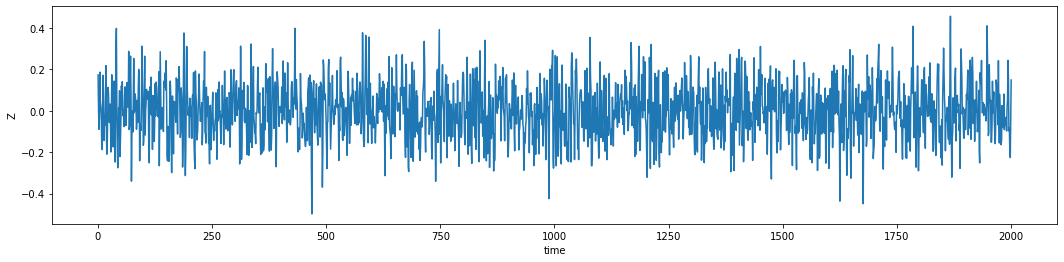

In [8]:
plt.rcParams['figure.figsize'] = 18, 4
for ii, ylabel in zip(range(3),['X','Y','Z']):
    plt.plot(times3,positions3[:,ii])
    plt.ylabel(ylabel)
    plt.xlabel('time')
    plt.show()

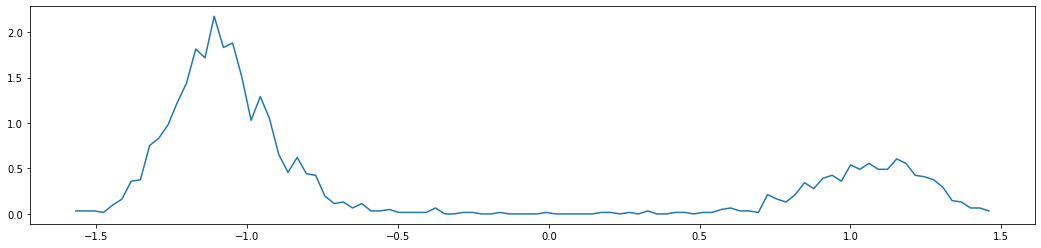

In [14]:
hist, bin_edges = np.histogram(positions4[:,0],bins=100, density=True)
plt.plot((bin_edges[1:]+bin_edges[:-1])/2.0,hist)
plt.show()